<a href="https://colab.research.google.com/github/Vitalyastiy/statistics/blob/main/CHi-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hi


In [3]:
'''Пример для расчета АВ теста 2х выборок NPS'''
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
# defining the table
data = [[ 779 , 275 , 601 ], [ 630 , 267 , 575 ]]
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print ( "p value is " + str (p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print ( 'Independent (H0 holds true)' )

p value is 0.05614666135033496
Independent (H0 holds true)


In [1]:
#------------------------ Хи2-------------------
#%%
'''Простой пример'''
import scipy.stats as sps
sps.contingency.expected_freq(([10, 6], [5, 15]))
#%%
'''Пример ручного расчета'''
# O - observed (наблюдаемый)
# E - expected (ожидаемый)
# решение предыдущей задачи

import numpy as np
emp = np.array([18, 55, 27])
teor = np.array([1,2,1])
k = sum(emp) / sum(teor)
ozid = teor * k
#решение этой задачи
sum((emp - ozid)**2 / ozid)

2.62

In [2]:
'''Пример с использованием скипи'''
from scipy.stats import chisquare
chisquare ([18,55,27], f_exp = [25,50,25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)


    Подсчет вручную:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
Отклоняем H0, 0.009823274507519235 < 0.05. Наше распределение неравномерно


(          Орел  Решка
 observed  40.0   20.0
 expected  30.0   30.0, 6.666666666666667, 0.009823274507519235)

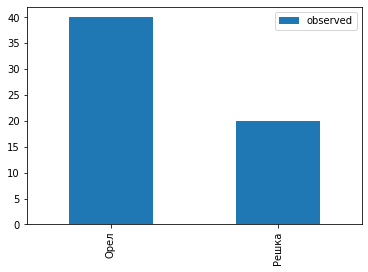

In [4]:
#######################   ХИ + распределение (визуализация примера орла и решки)  ###############
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
def monet(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    p_value = stats.chi2.sf(chi,df.shape[0] - 1)
    # Одним кодом
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    p_value = {p_value}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    p_value = {p_2}
    ''')
    if p_2 < 0.05:
        print(f'Отклоняем H0, {p_value} < 0.05. Наше распределение неравномерно')
    else:
        print('Распределение равномерно')
    return df, chi, p_value

monet(tail=20, eagle=40)


    Подсчет вручную:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
Отклоняем H0, 0.009823274507519235 < 0.05. Наше распределение неравномерно


(          Орел  Решка
 observed  40.0   20.0
 expected  30.0   30.0, 6.666666666666667, 0.009823274507519235)

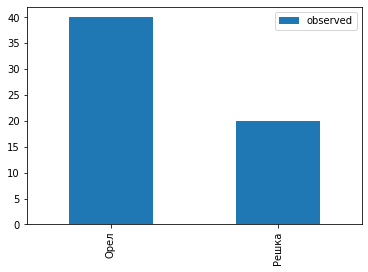

In [5]:
#######################   ХИ + распределение (визуализация примера орла и решки)  ###############
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
def monet(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    p_value = stats.chi2.sf(chi,df.shape[0] - 1)
    # Одним кодом
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    p_value = {p_value}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    p_value = {p_2}
    ''')
    if p_2 < 0.05:
        print(f'Отклоняем H0, {p_value} < 0.05. Наше распределение неравномерно')
    else:
        print('Распределение равномерно')
    return df, chi, p_value

monet(tail=20, eagle=40)

(array([493., 235., 127.,  64.,  31.,  21.,  12.,   6.,   5.,   6.]),
 array([0.        , 0.84857143, 1.69714286, 2.54571429, 3.39428571,
        4.24285714, 5.09142857, 5.94      , 6.78857143, 7.63714286,
        8.48571429]),
 <a list of 10 Patch objects>)

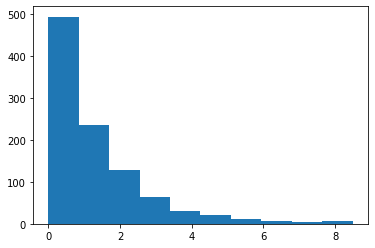

In [6]:
'''Пример хвоста Хи2, визуализция''' 
import numpy as np
import random
import matplotlib.pyplot as plt
probabilities = np.array([0.25, 0.5, 0.25])
def create_experiment():
    experiment = []
    for i in range(100):
        observed = [random.random() for i in range(3)]
        current_exp = observed < probabilities
        experiment.append(current_exp)
    experiment = np.array(experiment)
    np.count_nonzero(experiment[:0])

    experiment = np.array([np.count_nonzero(experiment[:,0]),np.count_nonzero(experiment[:,1]),np.count_nonzero(experiment[:,2])])
    return experiment
def chi_squared(observed, expected):
    return ((observed - expected)**2 / expected).sum()

chi_squared_array = []

for i in range(1000):
    observed = create_experiment()
    expected = observed.sum() * probabilities
    chi_sq = chi_squared(observed, expected)
    chi_squared_array.append(chi_sq)        
plt.hist(chi_squared_array)

(array([755., 153.,  36.,  20.,  19.,  10.,   2.,   1.,   2.,   2.]),
 array([ 0.        ,  1.30666667,  2.61333333,  3.92      ,  5.22666667,
         6.53333333,  7.84      ,  9.14666667, 10.45333333, 11.76      ,
        13.06666667]),
 <a list of 10 Patch objects>)

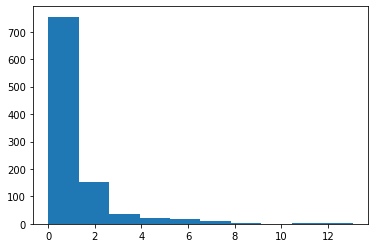

In [7]:
'''Распределение при многократном повторении, ручной расчет'''
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
n = 60
p = 0.5
N = 10**3

o1 = np.random.binomial(n, p, N)
o2 = np.ndarray((N))
o2.fill(60)
o2 = o2 - o1
e1 = np.ndarray((N))
e1.fill(int(n / 2))
e2 = e1.copy()
simulated_chi_dist = (o1 - e1)**2 / e1 + (o2 - e2)**2 / e2
plt.hist(simulated_chi_dist)

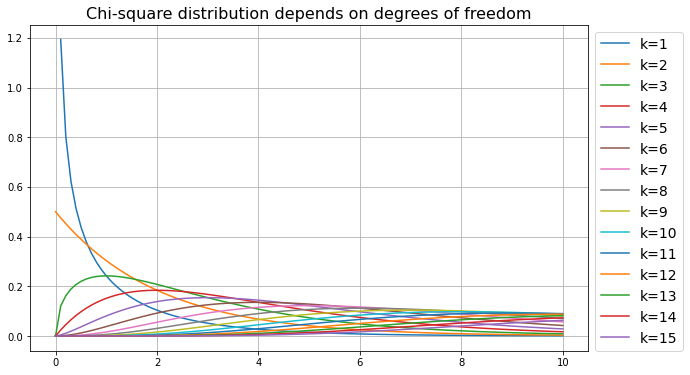

In [11]:

'''Распределение по степеням свободы'''
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_s = 5
x = np.linspace(0, 10, 100)
for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

In [13]:
#Хи2 с поправкой (используется для распределения признаков, которые принимают 2 значения )

from scipy import stats
observed_array = [ [15, 9], [11, 6] ]
#chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=True) 
# 'correction=True' - поправка Йейтса
print(f'Хи-квадрат = {chi2_value:.3f}, p-value = {p_value:.3f}, df = {df_value}')
print(f'Ожидаемые значения:\n{expected_array}')

'''Проверка в экселе
--------------------------
Посчитаем в Excel(с поправкой):
IN:  = = ((ABS(15-15,2195122)-0,5)^2)/15,2195122 + ((ABS(9-8,7804878)-0,5)^2)/8,7804878 + ((ABS(11-10,7804878)-0,5)^2)/10,7804878 + ((ABS(6-6,2195122)-0,5)^2)/6,2195122
OUT:  0,034
Excel без поправки:
IN:  = ((15-15,2195122)^2)/15,2195122 + ((9-8,7804878)^2)/8,7804878 + ((11-10,7804878)^2)/10,7804878 + ((6-6,2195122)^2)/6,2195122
OUT:  0,020871
'''

Хи-квадрат = 0.000, p-value = 1.000, df = 1
Ожидаемые значения:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


'Проверка в экселе\n--------------------------\nПосчитаем в Excel(с поправкой):\nIN:  = = ((ABS(15-15,2195122)-0,5)^2)/15,2195122 + ((ABS(9-8,7804878)-0,5)^2)/8,7804878 + ((ABS(11-10,7804878)-0,5)^2)/10,7804878 + ((ABS(6-6,2195122)-0,5)^2)/6,2195122\nOUT:  0,034\nExcel без поправки:\nIN:  = ((15-15,2195122)^2)/15,2195122 + ((9-8,7804878)^2)/8,7804878 + ((11-10,7804878)^2)/10,7804878 + ((6-6,2195122)^2)/6,2195122\nOUT:  0,020871\n'

1
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]
0.0


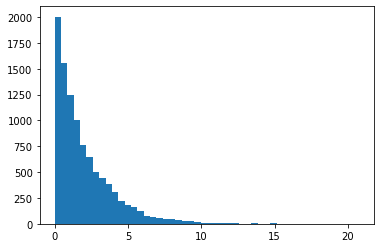

In [14]:
from scipy.stats import chi2_contingency
observed_values = [[15, 9], [11, 6]]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)
print(ddof)  # степени свободы
print(expected)  # ожидаемые значения
print(chi2)  # Хи-квадрат
# %%
plt.hist(np.array([random.normalvariate(0, 1)**2 + random.normalvariate(0, 1)**2 \
     for _ in range(10000)]), bins=48)
plt.show()

In [15]:
#%%
from scipy import stats
stats.chisquare([795, 705])
# %%
# пример для трех выборок + ексель
#pip install scipy
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
# defining the table
data = [[  18 ,	7], [ 6 ,	13]]
stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print ( "p value is " + str (p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print ( 'Independent (H0 holds true)' )

p value is 0.018195864430772903
Dependent (reject H0)


Thrombosis  No  Yes
Group              
Aspirin     13    6
Placebo      7   18


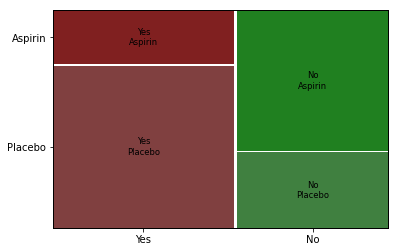

In [16]:
import  pandas as pd
#воссоздадим таблицу (и подпишем строки и столбцы)
patients = pd.DataFrame({"Thrombosis": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No"], "Group": ["Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Placebo","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin","Aspirin"]})
#посмотрим на сводную таблицу пересечения признаков
print(pd.pivot_table(patients, index=["Group"], columns=["Thrombosis"], aggfunc=lambda x: len(x)))
#строим график
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
mosaic(patients, ["Thrombosis","Group"], gap=0.01)
plt.show()

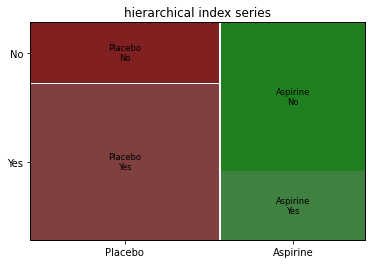

In [17]:

from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

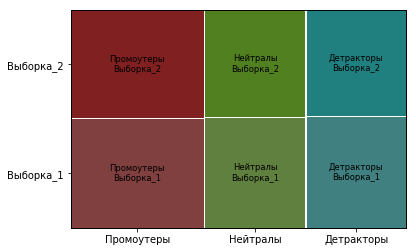

In [18]:

import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
tab = pd.DataFrame({
    'Выборка_1': [555, 423, 421],
    'Выборка_2': [550, 410, 400]
})
tab.index = ('Промоутеры', 'Нейтралы', 'Детракторы')

mosaic(tab.stack())
plt.show()
